In [2]:
import json
all_data = json.load(open("./hersheytext.json"))

In [3]:
all_data.keys()

dict_keys(['astrology', 'cursive', 'cyrillic', 'futural', 'futuram', 'gothiceng', 'gothicger', 'gothicita', 'greek', 'japanese', 'markers', 'mathlow', 'mathupp', 'meteorology', 'music', 'scriptc', 'scripts', 'symbolic', 'timesg', 'timesi', 'timesib', 'timesr', 'timesrb'])

In [4]:
futural = all_data['futural']['chars']

In [5]:
def idx(ch):
    return ord(ch)-33

In [6]:
def dch(font, ch):
    if ch == '':
        return 'M8,0'
    else:
        return font[idx(ch)]['d']
print(dch(futural, 'a'))
print(dch(futural, ''))

M15,8 L15,22 M15,11 L13,9 11,8 8,8 6,9 4,11 3,14 3,16 4,19 6,21 8,22 11,22 13,21 15,19
M8,0


In [7]:
import vsketch
from bezmerizing import Polyline
import math
import random
from numpy.random import uniform
import numpy as np

In [8]:
def to_plist(font, ch):
    plines = []
    current_plist = []
    mode = ''
    for t in dch(font, ch).split():
        if t[0] in ('M', 'L'):
            mode = t[0]
            t = t[1:]
        coords = [int(x) for x in t.split(',')]
        if mode == 'M':
            if len(current_plist) > 0:
                plines.append(current_plist)
                current_plist = []
        current_plist.append(coords)
    plines.append(current_plist)
    return plines

In [9]:
x_plist = to_plist(futural, "x")
x_plist

[[[3, 8], [14, 22]], [[14, 8], [3, 22]]]

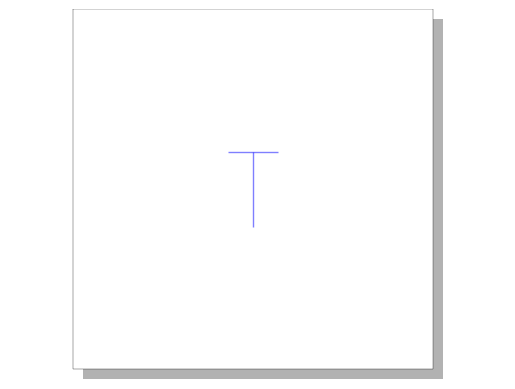

In [15]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
for pline in to_plist(futural, "T"):
    vsk.polygon(pline)
vsk.display()

In [23]:
pts = to_plist(futural, "T")

curve_pline = Polyline(pts).augment().catmull_spline().to_polyline(20)
curve_pline

[[array([8., 1.]), array([ 8., 22.])],
 [array([7.78772416, 1.        ]), array([ 8.21227584, 21.36317247])],
 [array([7.52339991, 1.        ]), array([ 8.47660009, 20.57019974])],
 [array([7.21315061, 1.        ]), array([ 8.78684939, 19.63945182])],
 [array([6.86309958, 1.        ]), array([ 9.13690042, 18.58929873])],
 [array([6.47937017, 1.        ]), array([ 9.52062983, 17.43811051])],
 [array([6.06808573, 1.        ]), array([ 9.93191427, 16.20425718])],
 [array([5.63536959, 1.        ]), array([10.36463041, 14.90610876])],
 [array([5.18734509, 1.        ]), array([10.81265491, 13.56203528])],
 [array([4.73013559, 1.        ]), array([11.26986441, 12.19040676])],
 [array([4.26986441, 1.        ]), array([11.73013559, 10.80959324])],
 [array([3.81265491, 1.        ]), array([12.18734509,  9.43796472])],
 [array([3.36463041, 1.        ]), array([12.63536959,  8.09389124])],
 [array([2.93191427, 1.        ]), array([13.06808573,  6.79574282])],
 [array([2.52062983, 1.        ]), arr

In [87]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
for pline in to_plist(futural, "T"):
    vsk.stroke(1)
    vsk.polygon(pline)
    vsk.stroke(2)
    curve_pline = Polyline(pline).augment().catmull_spline().to_polyline(200)
    vsk.polygon(curve_pline)
vsk.display()

ValueError: operands could not be broadcast together with shapes (2,2) (10,) 

In [28]:
def str_to_plist(font, s, kern=1.0):
    current_x = 0
    all_plines = []
    for ch in s:
        max_x = 0
        for pline in to_plist(font, ch):
            # translate to the current position of cursor
            translated = [[x+current_x, y] for x, y in pline]
            x_extent = max([c[0] for c in pline])
            if x_extent > max_x:
                max_x = x_extent
            all_plines.append(translated)
        current_x += max_x + kern
    return all_plines

In [ ]:
str_plist = str_to_plist(futural, "zit tix")
str_plist

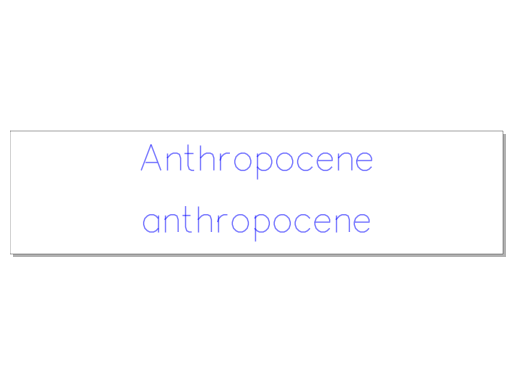

In [29]:
vsk = vsketch.Vsketch()
vsk.size("400mm", "100mm")
vsk.scale("1mm")
for pline in str_to_plist(futural, "Anthropocene"):
    vsk.polygon(pline)
with vsk.pushMatrix():
    vsk.translate(0, 50)
    for pline in str_to_plist(futural, "anthropocene"):
        vsk.polygon(pline)
vsk.display()

In [31]:
import itertools
def create_figure():
    all_pts = list(itertools.product([-1, 0, 1], [-1, 0, 1, 2]))
    pts = random.sample(all_pts, random.randrange(6, 10))
    return pts

In [32]:
#draw with 45 degree nib
def draw_with_nib(vsk, pline):
    for i in range(20):
        with vsk.pushMatrix():
            vsk.translate(i*0.02, i*0.02)
            vsk.polygon(pline)

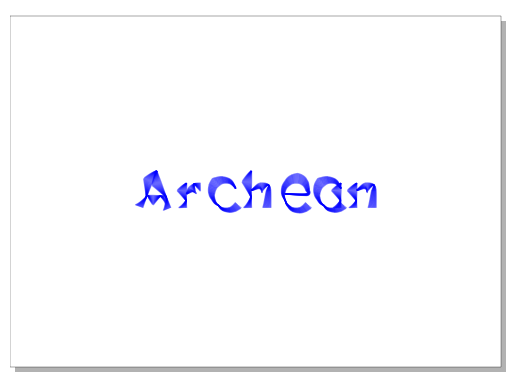

In [35]:
vsk = vsketch.Vsketch()
vsk.size("280mm", "200mm")
vsk.scale("1mm")
vsk.stroke(1)
for pline in str_to_plist(futural, "Archean", kern = 5):
        with vsk.pushMatrix():
#              vsk.translate(i*15, 25)
            curve_spline = Polyline(pline).augment().catmull_spline()
            curve_pts = curve_spline.to_polyline(20)  
#             vsk.scale(4)
            vsk.stroke(1)
#             vsk.polygon(pline)   
            vsk.stroke(2)
#             draw_with_nib(vsk, curve_pts)
            for i in range(10):
                offset_pline = curve_spline.tangent_offsets(
                    distances=[0, i*0.6, 0.2, i*0.5], samples_per=24).vertices
                vsk.polygon(offset_pline)
vsk.display()

In [ ]:
vsk.save("archean.svg")

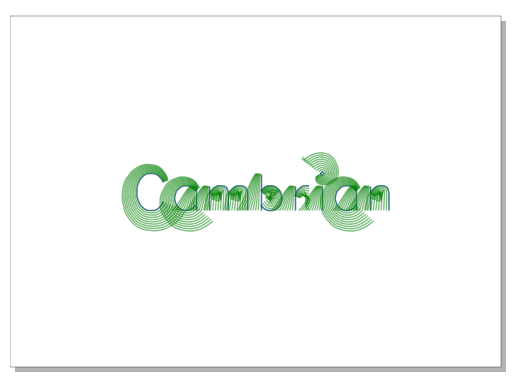

In [36]:
vsk = vsketch.Vsketch()
vsk.size("280mm", "200mm")
vsk.scale("1mm")
vsk.stroke(1)
for pline in str_to_plist(futural, "Cambrian", kern = 3.51):
#             vsk.translate(i*15, 25)
            curve_spline = Polyline(pline).augment().catmull_spline()
            curve_pts = curve_spline.to_polyline(20)  
#             vsk.scale(4)
            vsk.stroke(1)
            vsk.polygon(pline)  
#             with vsk.pushMatrix():
            vsk.stroke(2)
            for i in range(10):
                offset_pline = curve_spline.tangent_offsets(distances=[i*0.3, i*1.5], samples_per=36).vertices
                vsk.polygon(offset_pline)
vsk.display()

In [ ]:
vsk.save("cambrian.svg")

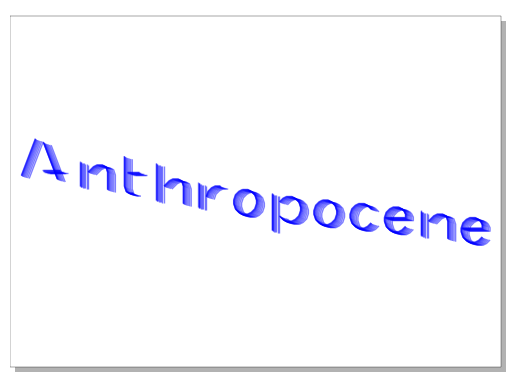

In [37]:
vsk = vsketch.Vsketch()
vsk.size("280mm", "200mm")
vsk.scale("1mm")
vsk.stroke(1)
for pline in str_to_plist(futural, "Anthropocene", kern = .1):
         for i in range(10):
             vsk.translate(i*0.1, 0.2)
             curve_spline = Polyline(pline).augment().catmull_spline()
             curve_pts = curve_spline.to_polyline(20)  
             vsk.stroke(1)
             vsk.polygon(pline)  
#              vsk.stroke(2)

#                 offset_pline = curve_spline.tangent_offsets(distances=[i*0.3, i*0.5], samples_per=36).vertices
#                 vsk.polygon(offset_pline)
vsk.display()

In [ ]:
vsk.save("anthropocene.svg")

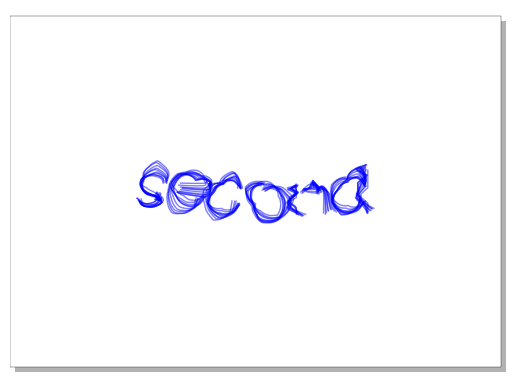

In [38]:
vsk = vsketch.Vsketch()
vsk.size("280mm", "200mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.scale(1.2)
for pline in str_to_plist(futural, "second", kern = 3.1):
         for i in range(10):
             vsk.translate(uniform(-1, 1), uniform(-1, 1))
             curve_spline = Polyline(pline).augment().catmull_spline()
             curve_pts = curve_spline.to_polyline(20)    
             offset_pline = curve_spline.tangent_offsets(distances=[0, i*0.6, 0, i*0.5, 4, i*0.6, 0, i*-0.4], samples_per=36).vertices
             vsk.polygon(offset_pline)
vsk.display()

In [ ]:
vsk.save("second.svg")

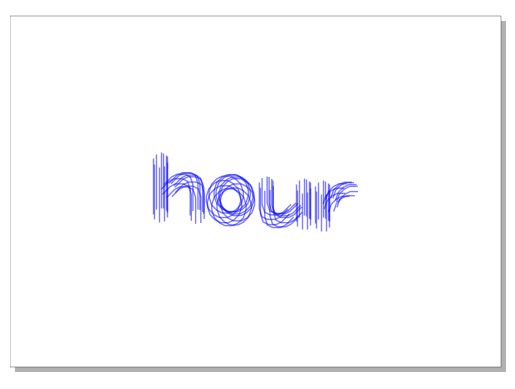

In [65]:
amp = 2 # adjust to make waves higher
freq_mult = 0.75 # adjust frequency of waves

vsk = vsketch.Vsketch()
vsk.size("280mm", "200mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.scale(1.5)
for pline in str_to_plist(futural, "hour", kern = .1):
          for i in range(10):
             vsk.translate(np.cos(i*freq_mult)*amp, np.sin(i*freq_mult)*amp)
             vsk.polygon(pline)
#              curve_spline = Polyline(pline).augment().catmull_spline()
#              curve_pts = curve_spline.to_polyline(20)    
#              offset_pline = curve_spline.tangent_offsets(distances=[0, i*0.6, 0, i*0.5, 4, i*0.6, 0, i*-0.4], samples_per=36).vertices
#              vsk.polygon(curve_pts)
vsk.display()

In [66]:
vsk.save("hour.svg")

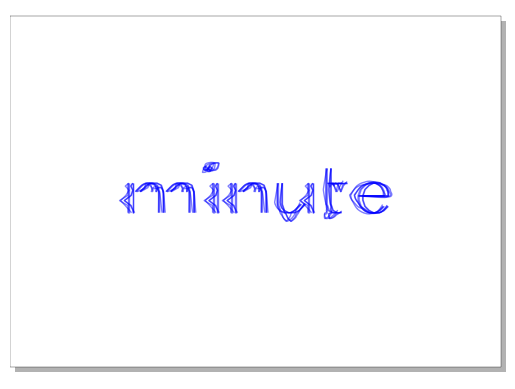

In [80]:
amp = 3 # adjust to make waves higher
freq_mult = 0.75 # adjust frequency of waves

vsk = vsketch.Vsketch()
vsk.size("280mm", "200mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.scale(1.2)
for pline in str_to_plist(futural, "minute", kern = .1):
          for i in range(4):
             vsk.translate(np.cos(i*freq_mult)*amp, 0)
             vsk.polygon(pline)
             curve_spline = Polyline(pline).augment().catmull_spline()
             curve_pts = curve_spline.to_polyline(20)    
             offset_pline = curve_spline.tangent_offsets(distances=[0, i*0.6, 0, i*0.5, 4, i*0.6, 0, i*-0.4], samples_per=36).vertices
             vsk.polygon(offset_pline)
vsk.display()

In [81]:
vsk.save("minutes.svg")

In [82]:
np.sin(np.linspace(0, 12, num=50))

array([ 0.        ,  0.24245733,  0.47044581,  0.67036003,  0.83026995,
        0.94063279,  0.99486256,  0.98972305,  0.92552097,  0.80608763,
        0.63855032,  0.43290697,  0.20142953, -0.0420684 , -0.28305585,
       -0.50715171, -0.70098285, -0.85298224, -0.95407918, -0.99824062,
       -0.9828312 , -0.90877049, -0.78047811, -0.60561003, -0.39460166,
       -0.16004509,  0.08406231,  0.32315322,  0.54295968,  0.73036456,
        0.8741843 ,  0.96583634,  0.99985128,  0.97419922,  0.890411  ,
        0.75348673,  0.57159749,  0.35559768,  0.11837728, -0.12590739,
       -0.36267843, -0.57780632, -0.75845312, -0.89383859, -0.97588346,
       -0.99969166, -0.96384239, -0.870475  , -0.72516127, -0.53657292])

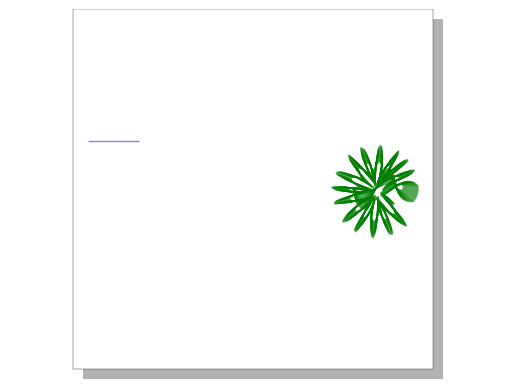

In [86]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.polygon(curve_pline)
vsk.stroke(2)
for i in range(20):
    offset_pline = curve_spline.tangent_offsets(
        distances=np.sin(np.linspace(0, 100, num=120))*(i+5)*0.25,
        samples_per=24).vertices
    vsk.polygon(offset_pline)
vsk.display()

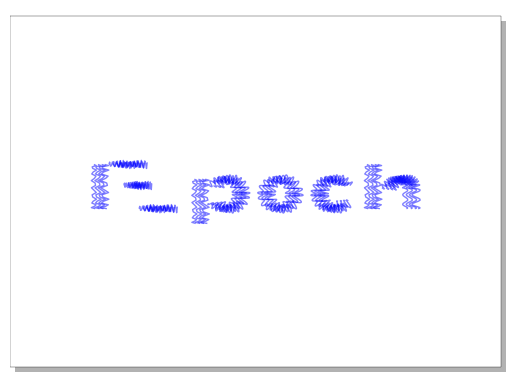

In [152]:
amp = 2 # adjust to make waves higher
freq_mult = 0.25 # adjust frequency of waves

vsk = vsketch.Vsketch()
vsk.size("280mm", "200mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.scale(1.2)
for pline in str_to_plist(futural, "Epoch", kern = 2.1):

        for i in range(4):
             vsk.translate(np.cos(i*freq_mult)*amp, 0)
#              vsk.polygon(pline)
             curve_spline = Polyline(pline).augment().catmull_spline()
#              curve_pts = curve_spline.to_polyline(20)    
#              offset_pline = curve_spline.tangent_offsets(distances=[0, i*0.6, 0, i*0.5, 4, i*0.6, 0, i*-0.4], samples_per=36).vertices
             offset_pline1 = curve_spline.tangent_offsets(
             distances=np.sin(np.linspace(0, 100, num=200))*(i+5)*0.25,
             samples_per=24).vertices 
             vsk.polygon(offset_pline1)
       
        
vsk.display()

In [153]:
vsk.save("Epoch.svg")

In [88]:
from pyaxidraw import axidraw

In [89]:
ad = axidraw.AxiDraw()

In [100]:
!axicli --mode align

In [97]:
dd = open("aeon.svg")

In [99]:
dd.set_size(('280mm','200mm'))
dd.save('aeon2.svg')

AttributeError: '_io.TextIOWrapper' object has no attribute 'set_size'

In [173]:
ad.plot_setup("hour2.svg")
ad.plot_run()

In [160]:
ad.plot_setup("year.svg")
ad.options.mode ="layers"
ad.options.layer = 2
ad.plot_run()

In [174]:
ad.disconnect()